In [1]:
import pandas as pd
import toad.transform


def fe_application(df):
    #上班天数比例
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    # 收入和授信比例
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    # 家庭人均收入   收入/家庭人口
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    # 年金/收入 比例
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    # 年金/授信比例
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    ft_list = ['income_per_person', 'DAYS_EMPLOYED_PERC', 'INCOME_CREDIT_PERC', 'INCOME_PER_PERSON',
               'ANNUITY_INCOME_PERC', 'PAYMENT_RATE']
    return df, ft_list

In [4]:
import pandas as pd
application_train_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\application_train_cleaned.csv')
application_train_ft, new_application_fts = fe_application(application_train_ft)
df_ft = application_train_ft

In [5]:
bureau_balance_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\bureau_balance.csv')
bureau_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\bureau_cleaned.csv')
pos_cash_balance_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\pos_cash_balance_cleaned.csv')
credit_card_balance_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\credit_card_balance_cleaned.csv')
previous_application_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\previous_application_cleaned.csv')
installment_payments_ft = pd.read_csv(r'I:\PYTHON\AI_datamining\data\processed\installment_payments_cleaned.csv')

In [35]:
bureau_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [36]:
bureau_ft.head(50)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,-1.00,0,91323.000,0.000,-1.000,0.0,Consumer credit,-131,-1.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,-1.0,-1.00,0,225000.000,171342.000,-1.000,0.0,Credit card,-20,-1.0
2,215354,5714464,Active,currency 1,-203,0,528.0,-1.0,-1.00,0,464323.500,-1.000,-1.000,0.0,Consumer credit,-16,-1.0
3,215354,5714465,Active,currency 1,-203,0,-1.0,-1.0,-1.00,0,90000.000,-1.000,-1.000,0.0,Credit card,-16,-1.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,-1.0,77674.50,0,2700000.000,-1.000,-1.000,0.0,Consumer credit,-21,-1.0
5,215354,5714467,Active,currency 1,-273,0,27460.0,-1.0,0.00,0,180000.000,71017.380,108982.620,0.0,Credit card,-31,-1.0
6,215354,5714468,Active,currency 1,-43,0,79.0,-1.0,0.00,0,42103.800,42103.800,0.000,0.0,Consumer credit,-22,-1.0
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.00,0,76878.450,0.000,0.000,0.0,Consumer credit,-1710,-1.0
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.00,0,103007.700,0.000,0.000,0.0,Consumer credit,-840,-1.0
9,162297,5714471,Active,currency 1,-1146,0,-484.0,-1.0,0.00,0,4500.000,0.000,0.000,0.0,Credit card,-690,-1.0


In [38]:
import toad
c = toad.transform.Combiner()
c.fit(df_ft.drop(['SK_ID_CURR'],axis=1),y='TARGET',method='chi',min_samples=0.05)
transer = toad.transform.WOETransformer()
df_ft_woe = transer.fit_transform(c.transform(df_ft),df_ft['TARGET'],exclude=['SK_ID_CURR','TARGET'])

In [41]:
df_ft_woe.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,1,-0.049678,0.379454,0.354427,0.103684,0.0,0.07661,-0.053434,0.0,...,0.156466,-0.151346,-0.162933,-0.096794,-0.159608,0.283314,-0.070561,-0.052928,-0.082302,0.435722
1,100003,0,-0.049678,-0.004373,0.203107,0.258976,0.0,0.07661,-0.053434,0.0,...,-0.432116,-0.151346,-0.162933,-0.096794,-0.159608,0.283314,-0.089259,-0.052928,-0.082302,-0.260785
2,100004,0,-0.049678,-0.168524,0.354427,0.103684,0.0,0.07661,0.193464,0.0,...,-0.183069,0.071397,0.137701,0.136671,0.150875,0.283314,-0.070561,-0.007209,-0.082302,-0.428290
3,100006,0,-0.049678,-0.168524,-0.185473,0.103684,0.0,0.07661,-0.053434,0.0,...,0.156466,0.071397,0.137701,0.136671,0.150875,0.027028,0.103293,-0.007209,0.061386,-0.554530
4,100007,0,-0.049678,-0.168524,-0.185473,-0.006683,0.0,0.07661,-0.053434,0.0,...,-0.432116,0.071397,0.137701,0.136671,0.150875,0.027028,0.103293,-0.052928,0.061386,-0.260785


In [42]:
df_ft_woe_stp = toad.selection.stepwise(df_ft_woe,df_ft_woe['TARGET'],
                                        exclude=['SK_ID_CURR','TARGET'],
                                        direction='both',
                                        criterion='ks',
                                        estimator='lr',
                                        intercept=False)
df_ft_woe_stp.shape

(307511, 6)

In [46]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
def lr_model(x,y,C):
    model = LogisticRegression(C=C,class_weight='balanced')
    model.fit(x,y)
    
    y_pred = model.predict_proba(x)[:,1]
    fpr,tpr,_=roc_curve(y,y_pred)
    x_ks = abs(fpr-tpr).max()
    print('x_ks:',x_ks)
    x_auc = roc_auc_score(y,y_pred)
    print('x_auc:',x_auc)
    
    from matplotlib import pyplot as plt
    plt.plot(fpr,tpr,label='x')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC CURVE')
    plt.legend(loc='best')
    plt.show()



In [48]:
x = df_ft_woe_stp.drop('TARGET',axis=1)
y = df_ft_woe_stp['TARGET']


x_ks: 0.006541187447569485
x_auc: 0.5022368664732281


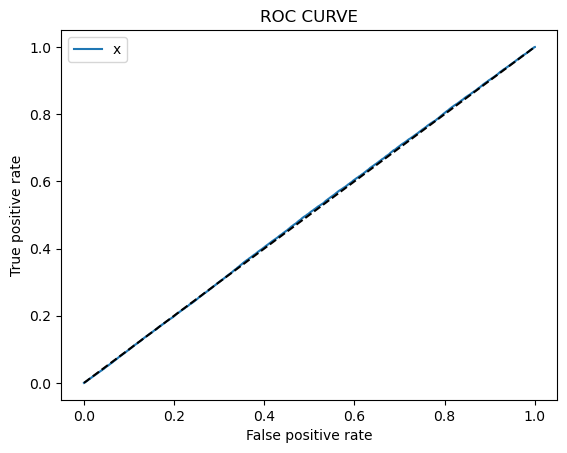

In [50]:
lr_model(x,y,0.1)